In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv("final_dataset_BFP .csv")
df.head()


,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4


In [7]:
df['BFPcase'].replace(['Obese','Acceptable','Fitness','Athletes'],[0,1,2,3],inplace=True)
print(df['BMIcase'])

0            normal
1            normal
2       over weight
3       over weight
4            normal
           ...     
4995         normal
4996    over weight
4997    over weight
4998    over weight
4999    over weight
Name: BMIcase, Length: 5000, dtype: object


C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\1082597123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BFPcase'].replace(['Obese','Acceptable','Fitness','Athletes'],[0,1,2,3],inplace=True)
C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\1082597123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [8]:
df['BMIcase'].replace([ 'sever thinness','mild thinness','moderate thinness','normal','over weight','obese','severe obese'],[0,1,2,3,4,5,6],inplace=True)
print(df['BMIcase'])

0       3
1       3
2       4
3       4
4       3
       ..
4995    3
4996    4
4997    4
4998    4
4999    4
Name: BMIcase, Length: 5000, dtype: int64


C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\4261180309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMIcase'].replace([ 'sever thinness','mild thinness','moderate thinness','normal','over weight','obese','severe obese'],[0,1,2,3,4,5,6],inplace=True)
C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\4261180309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to t

In [9]:
df['Gender'].replace(['Female','Male' ],[0,1],inplace=True)
print(df['Gender'])

0       1
1       1
2       0
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    0
Name: Gender, Length: 5000, dtype: int64


C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\799644029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Female','Male' ],[0,1],inplace=True)
C:\Users\hetam\AppData\Local\Temp\ipykernel_22096\799644029.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].rep

In [10]:
columns_to_drop = ['Exercise Recommendation Plan']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Weight               5000 non-null   float64
 1   Height               5000 non-null   float64
 2   BMI                  5000 non-null   float64
 3   Body Fat Percentage  5000 non-null   float64
 4   BFPcase              5000 non-null   int64  
 5   Gender               5000 non-null   int64  
 6   Age                  5000 non-null   int64  
 7   BMIcase              5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


In [11]:
X = df.drop(['BMIcase'],axis=1)
y = df.BMIcase

In [12]:
X.head(10)

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age
0,76.811975,1.820521,23.175956,18.281148,1,1,29
1,77.721154,1.945498,20.534184,13.731021,2,1,23
2,87.558726,1.742754,28.828859,42.304631,0,0,57
3,89.473356,1.758318,28.940017,27.958021,0,1,41
4,69.963943,1.722570,23.578732,16.464478,2,1,19
5,62.913627,1.498504,28.017479,34.200974,0,0,26
6,53.598341,1.864738,15.414007,9.886809,3,1,33
7,105.078061,1.743099,34.583405,50.590086,0,0,63
8,87.698358,1.818983,26.505403,39.976483,0,0,59
9,74.798901,1.710349,25.569717,29.433660,0,1,65


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Weight               5000 non-null   float64
 1   Height               5000 non-null   float64
 2   BMI                  5000 non-null   float64
 3   Body Fat Percentage  5000 non-null   float64
 4   BFPcase              5000 non-null   int64  
 5   Gender               5000 non-null   int64  
 6   Age                  5000 non-null   int64  
 7   BMIcase              5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.utils import to_categorical

Epoch 1/50


c:\Users\hetam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4176 - loss: 1.7286
Epoch 2/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6700 - loss: 0.9213
Epoch 3/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7329 - loss: 0.6617
Epoch 4/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7665 - loss: 0.5697
Epoch 5/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7955 - loss: 0.5027
Epoch 6/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8095 - loss: 0.4679
Epoch 7/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7954 - loss: 0.4779
Epoch 8/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8169 - loss: 0.4406
Epoch 9/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8134 - loss: 0.4417
Epoch 10/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8217 - loss: 0.4205
Epoch 11/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8225 - loss: 0.3963
Epoch 12/50
3500/3500 ━━━━━━━━━━━━━━━━━━━

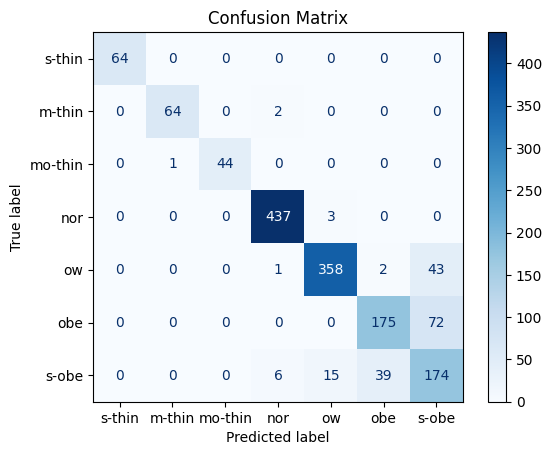

In [16]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)


classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu', input_dim=X_train_scaled.shape[1]))
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu'))
classifier.add(Dense(units=7, kernel_initializer=HeUniform(), activation='softmax'))


opt = Adam(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


classifier.fit(X_train_scaled, y_train_encoded, batch_size=1, epochs=50, verbose=1)

score, acc = classifier.evaluate(X_train_scaled, y_train_encoded, batch_size=10)
test_loss, test_accuracy = classifier.evaluate(X_test_scaled, y_test_encoded, batch_size=10)

print('Train score:', score)
print('Train accuracy:', acc)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


y_pred_proba = classifier.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)  
y_test_labels = np.argmax(y_test_encoded, axis=1) 


cm = confusion_matrix(y_test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['s-thin','m-thin','mo-thin','nor','ow','obe','s-obe'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [17]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419 (1.64 KB)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 280 (1.10 KB)

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.utils import to_categorical

# Assuming the model has been trained as per your previous code
def categorize_bfp(bfp):
    if 14 <= bfp <= 20:
        return 3
    elif 21 <= bfp <= 24:
        return 2
    elif 25 <= bfp <= 31:
        return 1
    elif bfp >= 32:
        return 0
    else:
        return 'Invalid BFP value'

def get_user_input():
    print("Enter the following details for prediction:")
    weight = float(input("Enter weight: "))
    height = float(input("Enter height: "))
    BMI = float(weight/height**2)
    body_fat_percentage = float(input("Enter Body Fat Percentage: "))
    bfp = categorize_bfp(body_fat_percentage)
    gender = input("Enter Gender (Male=1/Female=0): ")
    age = int(input("Enter Age: "))
    
    # Convert gender to numerical (as done during training)
    gender = 1 if gender.lower() == 'male' else 0
    
    # Combine the input features into a numpy array
    user_input = np.array([[weight, height,BMI, body_fat_percentage,bfp, gender, age]])
    
    return user_input

# Preprocessing function (to scale input)
def preprocess_input(input_data, scaler):
    return scaler.transform(input_data)

# Function to make a prediction
def predict_class(model, user_input_scaled):
    # Predict probability distribution across classes
    y_pred_proba = model.predict(user_input_scaled)
    
    # Get the index of the highest probability class
    predicted_class = np.argmax(y_pred_proba, axis=1)[0]
    
    # Map class index to human-readable label
    class_labels = {0: 'Severe Thinness', 1: 'Mild Thinness', 2: 'Moderate Thinness', 3: 'Normal', 4: 'Overweight', 5: 'Obese', 6: 'Severe Obese'}
    return class_labels[predicted_class]

# Get user input
user_input = get_user_input()

# Load the scaler and the trained model (assumed to be available)
# scaler is assumed to be already fitted
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train data scaling
X_test_scaled = scaler.transform(X_test)        # Test data scaling

# Preprocess the user input
user_input_scaled = preprocess_input(user_input, scaler)

# Assuming the model 'classifier' is already trained
# classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict the class for the user input
predicted_class = predict_class(classifier, user_input_scaled)

# Output the predicted class
print(f"The predicted BMI category is: {predicted_class}")


Enter the following details for prediction:


c:\Users\hetam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: np.str_('Invalid BFP value')